# EDSA Apple Price Challenge
#### Team TS5 Regression

## Challenge description

## Outline

## Introduction

## EDA on the `EDSA Apple Price Challenge` dataset

### Basic Analysis

We will be importing a few python libraries.

In [1]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model selection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

# Other
from scipy import stats
import math
import pickle
import pandas as pd
import numpy as np

We will be loading our data as a Pandas Dataframe. For this challenge we will be using `EDSA Apple Price Challenge` dataset.

In [2]:
train = pd.read_csv('df - train_set.csv')
test = pd.read_csv('df - test_set.csv')

In [27]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


We look at the top rows of our data in order to see the features as well as the types of data we are working with.



### Preliminary data preprocessing

If we want to build some relationship between variables that are likely to indicate the average price per kg of Golden Delicious Apples, we really only want to consider the sales which involved Golden Delicious Apples to build this relationship:

In [3]:
test = test.drop('Commodities', axis=1)
train = train[train['Commodities']=='APPLE GOLDEN DELICIOUS']
train = train.drop('Commodities', axis=1) 
train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [29]:
train.shape

(1952, 12)

The shape command shows us we have...

## Summary Statistics

In this section we will explore the data types and the summary statistics of our variables.

Let's start by looking at the data types and number of entries of each column.

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
Province            1952 non-null object
Container           1952 non-null object
Size_Grade          1952 non-null object
Weight_Kg           1952 non-null float64
Date                1952 non-null object
Low_Price           1952 non-null float64
High_Price          1952 non-null float64
Sales_Total         1952 non-null float64
Total_Qty_Sold      1952 non-null int64
Total_Kg_Sold       1952 non-null float64
Stock_On_Hand       1952 non-null int64
avg_price_per_kg    1952 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


The info command confirms our categorial and numerial features. This function tells us what columns are in the dataframe, how many null values they have and what datatype they are.

Now let's look at a table showcasing the summary statistics of the data.

In [31]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


### Dummy Variable Encoding

All input data for regression model building purposes needs to be numerical. We therefore have to transform the text data (found within columns such as 'Province','Container', 'Size_Grade', 'Commodities' and 'Date') into numbers before we can train our machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called get_dummies. The text data are categorical variables, and ***get_dummies*** will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [4]:
dummy_df = pd.get_dummies(train)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,1,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,1,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
dummy_df.shape

(1952, 183)

Suddenly we have many more variable columns (our original 12 variable columns are now 183 given the dummy variable encoding). 

## Correlations and Model Structure

Using the dummy variable dataframe, we can build a model that predicts `avg_price_per_kg` (our dependent variable) as a function of 182 different independent variables (IVs)

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [5]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df = dummy_df.reindex(columns=column_titles)

In [6]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Size_Grade_1L,0.280966
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028


We can see from the correlations that it's not be the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with redundant information.

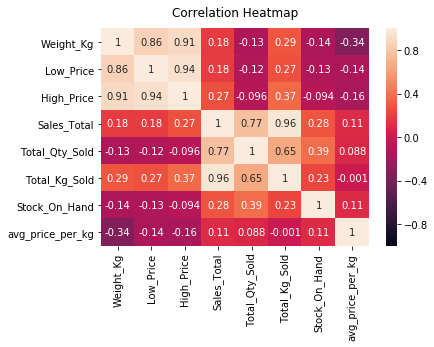

In [7]:
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The heatmap above was generated using only the numberical columns before Dummy Variable Encoding is applied. This is because it will be difficult to analysis a heatmap with 183 columns. However, this heatmap will be suffice to show collinearity between predictor variables i.e. : 

- `Low_Price` and `High_Price` has a high positive correlation

This will likely be a problem when we build a model.

## Create functions to fit the data and make predictions using sklearn

In [87]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [88]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = dummy_df['avg_price_per_kg']
y.shape

(1952,)

In [89]:
# fit the model to the data and make predictions - all features
X = dummy_df.drop('avg_price_per_kg',axis=1).values
y = dummy_df['avg_price_per_kg']

fit_and_evaluate(model,X,y)

{'Train RMSE': 1.2139989096502701,
 'Train R^2': 0.7140911369818779,
 'Test RMSE': 1.410571175163233,
 'Test R^2': 0.5711931564754693}

**Metrics used**
  - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
  - R-squared is a statistical measure of how close the data are to the fitted regression line. It is also  known as the coefficient of determination, or the coefficient of multiple determination for multiple regression; it is the percentage of the response variable variation that is explained by a linear model.

## Fitting the model using `statsmodels.OLS`

### Generating the regression string

Fitting a machine learning model requires a sort of string of the form:

`y ~ X`

which is read as follows: "Regress y on X". The `statsmodels` library works in a similar way, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [8]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = dummy_df.copy()

# Again we make sure that all the column names have underscores instead of spaces/dashes/fullstops
dfm.columns = [col.replace(" ","_") for col in dfm.columns] 
dfm.columns = [col.replace("-","_") for col in dfm.columns]
dfm.columns = [col.replace(".","_") for col in dfm.columns]

# The dependent variable:
y_name = 'avg_price_per_kg'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + Province_CAPE + Province_EASTERN_CAPE + Province_NATAL + Province_ORANGE_FREE_STATE + Province_TRANSVAAL + Province_W_CAPE_BERGRIVER_ETC + Province_WEST_COAST + Container_AC030 + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1L + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X + Date_2019_12_11 + Date_2019_12_12 + Date_2019_12_14 + Date_2019_12_23 + Date_2019_12_30 + Date_2020_01_02 + Date_2020_01_03 + Date_2020_01_04 + Date_2020_01_06 + Date_2020_01_08 + Date_2020_01_09 + Date_2020_01_10 + Date_2020_01_11 + Date_2020_01_13 + Date_2020_01_14 + Date_2020_01_16 + Date_2020_01_20 + Date_2020_01_21 + Date_2020_01_23 + Date_2020

In [9]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     23.14
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        10:13:06   Log-Likelihood:                -3183.3
No. Observations:                1952   AIC:                             6723.
Df Residuals:                    1774   BIC:                             7715.
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

We can see that there is a warning about strong multicollinearity. This is likely as a result of the incorrect filtering of one hot encoded dummy variables ( we noticed earlier that `Low_Price` and `High_Price` are positively correlated).

In order to ensure that we don't assume an underlying relationship between the categories, we can call `pd.get_dummies` with the argument `drop_first=True` so that we only create n-1 columns for each variable with n categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's). 

In [10]:
dummy_df2 = pd.get_dummies(train, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces/dashes/fullstops
dummy_df2.columns = [col.replace(" ", "_") for col in dummy_df2.columns]
dummy_df2.columns = [col.replace("-", "_") for col in dummy_df2.columns]
dummy_df2.columns = [col.replace(".", "_") for col in dummy_df2.columns]

# Reorder columns with the dependent variable (avg_price_per_kg) the last column
column_titles = [col for col in dummy_df2.columns if col != 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df2 = dummy_df2.reindex(columns=column_titles)

dummy_df2.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,...,Date_2020_09_09,Date_2020_09_16,Date_2020_09_17,Date_2020_09_19,Date_2020_09_21,Date_2020_09_23,Date_2020_09_28,Date_2020_10_01,Date_2020_10_03,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,1,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.55
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,6.11
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,4.51
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,4.50


In [54]:
dummy_df2.shape

(1952, 179)

We now have 179 columns instead of 183. This gives us 178 potential independent variables that could be used to build a relationship on `avg_price_per_kg`

**Let's check what the OLS model summary would say if we now fit only the 179 variable columns**

In [11]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in dummy_df2.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dummy_df2)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     23.14
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        10:15:17   Log-Likelihood:                -3183.3
No. Observations:                1952   AIC:                             6723.
Df Residuals:                    1774   BIC:                             7715.
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Variable Selection by Correlation and Significance

We now have 179 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the `avg_price_per_kg` and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are. 

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [12]:
# Calculate correlations between predictor variables and the response variable
correlation = dummy_df2.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [13]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles2 = [col for col in correlation.index if col != 'avg_price_per_kg']
for col in column_titles2:
    p_val = round(pearsonr(dummy_df2[col], dummy_df2['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':correlation[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.05]

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN_CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000


In [14]:
# The dependent variable remains the same:
y_data = dummy_df2[y_name]  # y_name = 'avg_size_per_kg'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = dummy_df2[X_names]

In [15]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,High_Price,Low_Price,Weight_Kg,Container_IA400,High_Price,Container_IA400,High_Price,Weight_Kg
Low_Price,0.938140,1.000000,0.863182,0.860219,0.938140,0.860219,0.938140,0.863182
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231


In [16]:
# Lets take a new subset of our potential independent variables
X_remove = ['Low_Price']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	avg_price_per_kg ~ Container_M4183 + Province_W_CAPE_BERGRIVER_ETC + Size_Grade_1X + Container_EC120 + Size_Grade_1M + Container_EF120 + Sales_Total + Stock_On_Hand + Date_2019_12_12 + Total_Qty_Sold + Date_2019_12_14 + Date_2020_02_14 + Date_2020_01_08 + Date_2020_02_03 + Date_2020_02_05 + Date_2020_02_22 + Date_2020_06_13 + Date_2020_01_13 + Date_2020_08_24 + Date_2020_07_22 + Date_2020_04_28 + Date_2020_03_10 + Size_Grade_2X + Date_2020_05_07 + Date_2020_04_17 + Date_2020_07_21 + Container_DT063 + Date_2020_07_23 + Date_2020_07_20 + Size_Grade_2U + Date_2020_07_25 + Size_Grade_2L + Container_JG110 + Size_Grade_2M + High_Price + Province_EASTERN_CAPE + Container_JE090 + Weight_Kg + Size_Grade_2S + Container_IA400 + Province_NATAL


In [17]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dummy_df2)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     67.22
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        10:16:03   Log-Likelihood:                -3479.4
No. Observations:                1952   AIC:                             7043.
Df Residuals:                    1910   BIC:                             7277.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Variable Selection by Variance Thresholds

Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

It is important to note that variance is dependent on scale, so the features will have to be normalized before implementing variance thresholding.

In [18]:
# Separate data into independent (X) and independent (y) variables
X_names = list(dummy_df.columns)
X_names.remove(y_name)
X_data = dummy_df[X_names]
y_data = dummy_df[y_name]

In [19]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

### Variance Threshold in Scikit Learn

To implement Variance Threshold in Scikit Learn we have to do the following:

Import and create an instance of the VarianceThreshold class;
Use the .fit() method to select subset of features based on the threshold.

In [20]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

The Variance Threshold has been applied to the data. Let's look at the calculated variance for each predictive variable. 

In [21]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
7,Province_CAPE,0.248750
22,Container_M4183,0.210490
20,Container_JE090,0.205667
27,Size_Grade_1S,0.198262
16,Container_EC120,0.176834
12,Province_W.CAPE-BERGRIVER ETC,0.174600
26,Size_Grade_1M,0.136715
32,Size_Grade_2S,0.132890
31,Size_Grade_2M,0.104727
25,Size_Grade_1L,0.101980


The above table shows the variances of the individual columns before any threshold is applied. It allows us to revise our initial variance threshold if we feel that we might exclude important variables.


Next we need to extract the results and use them to select our new columns - which form a subset of all the columns.

In [22]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Weight_Kg,Province_CAPE,Province_EASTERN CAPE,Province_NATAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_EC120,Container_EF120,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Size_Grade_1L,Size_Grade_1M,Size_Grade_1S,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S
0,0.038539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.015113,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.038539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
X_new.shape

(1952, 19)

## Conclusion